# Transfer Learning with VGG19

In [1]:
# download dataset
!gdown "https://drive.google.com/uc?id=1dIxJQ8G5GlxV5tb3meBk88QC6gk-rpzC" -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1dIxJQ8G5GlxV5tb3meBk88QC6gk-rpzC
To: /content/dataset.zip
100% 1.40G/1.40G [00:22<00:00, 60.8MB/s]


In [2]:
# download test dataset
!gdown "https://drive.google.com/uc?id=1eoluKNqVtkLqM2dxaGFAwjkO1J0WorI0" -O test.zip

Downloading...
From: https://drive.google.com/uc?id=1eoluKNqVtkLqM2dxaGFAwjkO1J0WorI0
To: /content/test.zip
100% 4.01M/4.01M [00:00<00:00, 247MB/s]


In [3]:
!unzip dataset.zip -d dataset
!unzip test.zip -d test

Streaming output truncated to the last 5000 lines.
  inflating: dataset/e_kettle/Bing_0333.webp  
  inflating: dataset/e_kettle/Bing_0334.jpeg  
  inflating: dataset/e_kettle/Bing_0335.jpeg  
  inflating: dataset/e_kettle/Bing_0336.jpeg  
  inflating: dataset/e_kettle/Bing_0338.jpeg  
  inflating: dataset/e_kettle/Bing_0339.jpeg  
  inflating: dataset/e_kettle/Bing_0341.jpeg  
  inflating: dataset/e_kettle/Bing_0343.jpeg  
  inflating: dataset/e_kettle/Bing_0344.jpeg  
  inflating: dataset/e_kettle/Bing_0350.jpeg  
  inflating: dataset/e_kettle/Bing_0352.jpeg  
  inflating: dataset/e_kettle/Bing_0354.jpeg  
  inflating: dataset/e_kettle/Bing_0355.jpeg  
  inflating: dataset/e_kettle/Bing_0358.jpeg  
  inflating: dataset/e_kettle/Bing_0360.jpeg  
  inflating: dataset/e_kettle/Bing_0362.jpeg  
  inflating: dataset/e_kettle/Bing_0363.webp  
  inflating: dataset/e_kettle/Bing_0364.jpeg  
  inflating: dataset/e_kettle/Bing_0365.jpeg  
  inflating: dataset/e_kettle/Bing_0366.jpeg  
  inflati

## Import Libraries

In [24]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# avoid error
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Data Preprocessing

In [5]:
train_data_dir = 'dataset/'

### Preview Data

In [6]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [7]:
IMAGE_SIZE = 150
BATCH_SIZE = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    rotation_range=40,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    fill_mode='nearest'
                                validation_split=0.2)

In [9]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 4023 images belonging to 13 classes.
Found 1000 images belonging to 13 classes.


## Modelling

### Pre-Trained Model Load

In [10]:
# Load the pre-trained VGG19 model
vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                    include_top=False,
                                    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg19.layers:
    vgg19.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


### Fine Tuning

In [25]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    vgg19,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(13, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)              

In [26]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


126/126 [==============================] - 144s 1s/step - loss: 1.1364 - accuracy: 0.6378 - val_loss: 0.6679 - val_accuracy: 0.7820
Epoch 2/30
126/126 [==============================] - 138s 1s/step - loss: 0.4782 - accuracy: 0.8551 - val_loss: 0.7444 - val_accuracy: 0.7890
Epoch 3/30
126/126 [==============================] - 139s 1s/step - loss: 0.3213 - accuracy: 0.9026 - val_loss: 0.7633 - val_accuracy: 0.7920
Epoch 4/30
126/126 [==============================] - 145s 1s/step - loss: 0.2021 - accuracy: 0.9393 - val_loss: 0.7418 - val_accuracy: 0.8190
Epoch 5/30
126/126 [==============================] - 139s 1s/step - loss: 0.1336 - accuracy: 0.9587 - val_loss: 0.8236 - val_accuracy: 0.8020
Epoch 6/30
126/126 [==============================] - 145s 1s/step - loss: 0.1648 - accuracy: 0.9443 - val_loss: 1.2063 - val_accuracy: 0.7490
Epoch 7/30
126/126 [==============================] - 137s 1s/step - loss: 0.1128 - accuracy: 0.9664 - val_loss: 0.7363 - val_accuracy: 0.8270
Epoch 8/30

## Model Evaluation

In [18]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

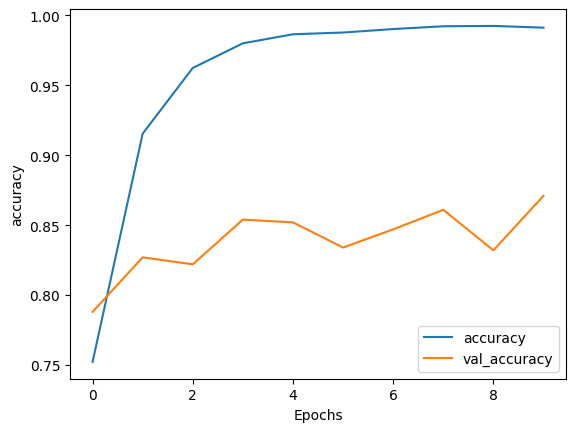

In [19]:
plot_graghs(history, 'accuracy')

### Loss

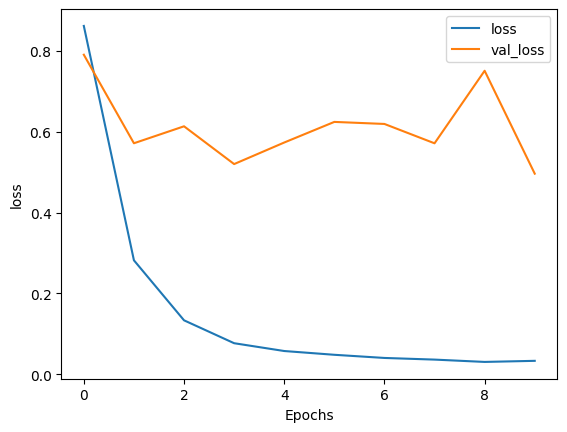

In [20]:
plot_graghs(history, 'loss')

## Model Predictions

In [23]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

label = ['battery', 'cable', 'e_kettle', 'keyboard', 'laptop', 'light_bulb', 'monitor', 'mouse', 'pcb', 'phone', 'printer', 'rice_cooker', 'tv']
for fn in os.listdir('test/test'):
  path = './test/test/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  for i, l in zip(classes[0], label):
    print("{} : {:.2%}".format(l, i))

1/1 [==============================] - 2s 2s/step
monitor_mati.jpg
battery : 0.03%
cable : 0.02%
e_kettle : 0.00%
keyboard : 0.46%
laptop : 2.72%
light_bulb : 0.03%
monitor : 10.59%
mouse : 0.02%
pcb : 0.03%
phone : 28.95%
printer : 0.02%
rice_cooker : 0.01%
tv : 57.12%
1/1 [==============================] - 0s 30ms/step
laptop_0,5_mati.jpg
battery : 0.00%
cable : 0.01%
e_kettle : 0.01%
keyboard : 0.31%
laptop : 9.75%
light_bulb : 0.00%
monitor : 23.80%
mouse : 1.12%
pcb : 0.05%
phone : 0.08%
printer : 64.87%
rice_cooker : 0.01%
tv : 0.00%
1/1 [==============================] - 0s 26ms/step
phone_hidup.jpg
battery : 0.04%
cable : 0.04%
e_kettle : 0.00%
keyboard : 0.06%
laptop : 5.60%
light_bulb : 0.00%
monitor : 0.08%
mouse : 40.88%
pcb : 12.28%
phone : 40.96%
printer : 0.05%
rice_cooker : 0.00%
tv : 0.00%
1/1 [==============================] - 0s 23ms/step
monitor_hidup.jpg
battery : 0.01%
cable : 0.00%
e_kettle : 0.00%
keyboard : 3.07%
laptop : 31.20%
light_bulb : 0.02%
monitor : 33.

## Save the Model

In [ ]:
# Save the model
# model.save('e_waste_classifier.h5')